### Compare posterior param range distribution to prior

The purpose of this script is to see if the aprior param ranges should be updated in the LHS to increase sampling density in the range of param values that result in success.

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [57]:
PEAS_members = pd.read_csv('/home/adamhb/gdrive/postdoc/simulation_output/passsing_CZ2_equilibrium_110323_and_110523_with_fire.csv')
param_ranges = pd.read_csv('/home/adamhb/gdrive/postdoc/california-fates/parameter_ranges/param_range_archive/param_ranges_100223.csv')            

In [58]:
PEAS_members = PEAS_members.loc[PEAS_members['inst'].isin([2, 8, 14, 15, 22, 24, 25, 26, 30, 33, 46, 48, 50, 51, 52])]

In [5]:
param_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pft_ineq           101 non-null    object 
 1   param              101 non-null    object 
 2   pft                101 non-null    int64  
 3   organ              9 non-null      float64
 4   value_min          92 non-null     float64
 5   value_max          95 non-null     float64
 6   apriori_value      66 non-null     object 
 7   source_min         91 non-null     object 
 8   source_max         88 non-null     object 
 9   source_apriori     55 non-null     object 
 10  comments           27 non-null     object 
 11  link               5 non-null      object 
 12  additional_values  0 non-null      float64
dtypes: float64(4), int64(1), object(8)
memory usage: 10.4+ KB


In [55]:
vars = ['fates_fire_alpha_SH_1','fates_fire_alpha_SH_2','fates_allom_d2ca_coefficient_max_5','fates_leaf_vcmax25top_5','fates_mort_hf_sm_threshold_0','fates_fire_nignitions_0','fates_fire_threshold_0','fates_fire_frac_resprout_4',
        'fates_fire_frac_resprout_5','fates_disturbance_germ_4','fates_recruit_seed_germination_rate_4',
        'fates_mort_bmort_1']

def split_string_before_integer(s):
    # This pattern looks for an underscore that is immediately followed by one or more digits
    # and splits the string at this underscore.
    pattern = r'_(?=\d+)'
    return re.split(pattern, s)
    
def HistModelObs(PEAS_members,param_ranges,var):
    '''
    Returns a histogram comparing the model data to a range

    Inputs:
    - modData: dataframe of model metrics
    - Obs: dictionary of observations from the literature. Each list is a range of a particular observation
    - Var: variable name to plot

    Output:
    - histogram
    '''

    var_name = split_string_before_integer(var)[0]
    print(var_name)
    
    pft = split_string_before_integer(var)[1]
    print(pft)
    # Get min and max ranges
    param_filter = param_ranges['param'] == var_name
    print(sum(param_filter))
    
    pft_filter = param_ranges['pft'] == int(pft)
    print(sum(pft_filter))
    param_data = param_ranges.loc[param_filter & pft_filter]
    print(param_data)
    
    
    min_val = list(param_data['value_min'])[0]
    max_val = list(param_data['value_max'])[0]

    var_data = PEAS_members[var]
    
    n, bins, patches = plt.hist(var_data, bins=15, alpha=0.9, color='white', edgecolor='black', label = "Param")
    line1 = plt.axvline(x=min_val, color='black', linestyle='--', linewidth=2, label = "Obs. range")
    line2 = plt.axvline(x=max_val, color='black', linestyle='--', linewidth=2)
    
    plt.ylabel("Number of ensemble members")
    plt.legend()
    plt.tight_layout()
    plt.show()

fates_fire_alpha_SH
1
5
17
  pft_ineq                param  pft  organ  value_min  value_max  \
9    FALSE  fates_fire_alpha_SH    1    NaN        0.1        0.9   

  apriori_value             source_min              source_max  \
9         0.219  Thonicke et al., 2010  Maximum possible value   

                            source_apriori comments link  additional_values  
9  Initial testing and Buotte et al., 2021      NaN  NaN                NaN  


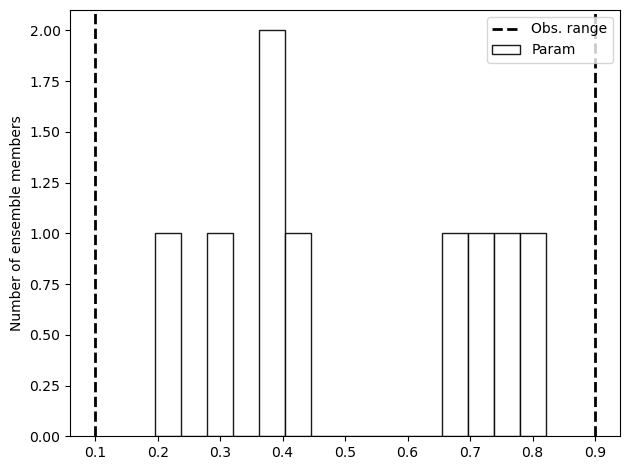

fates_fire_alpha_SH
2
5
17
   pft_ineq                param  pft  organ  value_min  value_max  \
10    >pine  fates_fire_alpha_SH    2    NaN        0.1        0.9   

   apriori_value             source_min              source_max  \
10           NaN  Thonicke et al., 2010  Maximum possible value   

   source_apriori comments link  additional_values  
10            NaN      NaN  NaN                NaN  


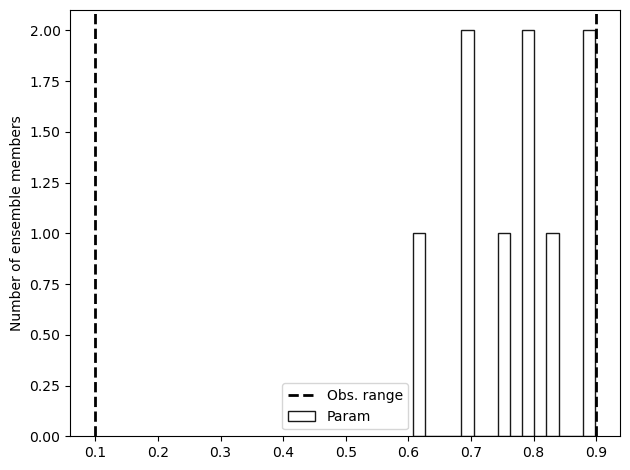

fates_allom_d2ca_coefficient_max
5
5
19
   pft_ineq                             param  pft  organ  value_min  \
95    FALSE  fates_allom_d2ca_coefficient_max    5    NaN   0.433218   

    value_max apriori_value  \
95   1.344069           NaN   

                                           source_min  \
95  McPherson. Then I lowered from 0.6 to 0.4 beca...   

                                           source_max source_apriori comments  \
95  McPherson, then I lowered from 1.6 to 1.3 beca...            NaN      NaN   

   link  additional_values  
95  NaN                NaN  


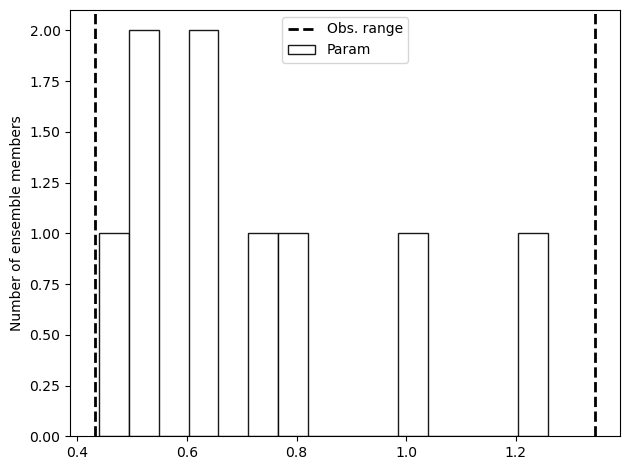

fates_leaf_vcmax25top
5
5
19
   pft_ineq                  param  pft  organ  value_min  value_max  \
42    FALSE  fates_leaf_vcmax25top    5    NaN       30.0       83.0   

   apriori_value                                         source_min  \
42            61  10th percentile for Q. douglasii (TRY).  Initi...   

                                source_max   source_apriori comments link  \
42  75th percentile for Q. douglasii (TRY)  Initial testing      NaN  NaN   

    additional_values  
42                NaN  


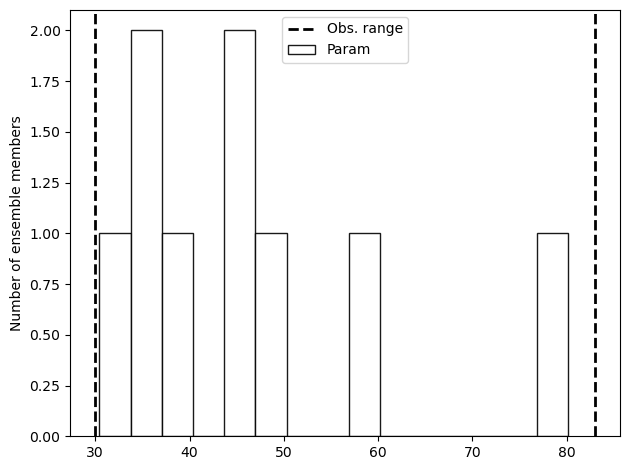

fates_mort_hf_sm_threshold
0
1
11
   pft_ineq                       param  pft  organ  value_min  value_max  \
76    FALSE  fates_mort_hf_sm_threshold    0    NaN      0.001        0.3   

   apriori_value source_min                source_max   source_apriori  \
76           0.2     Tuning  Initial testing / tuning  Initial testing   

   comments link  additional_values  
76      NaN  NaN                NaN  


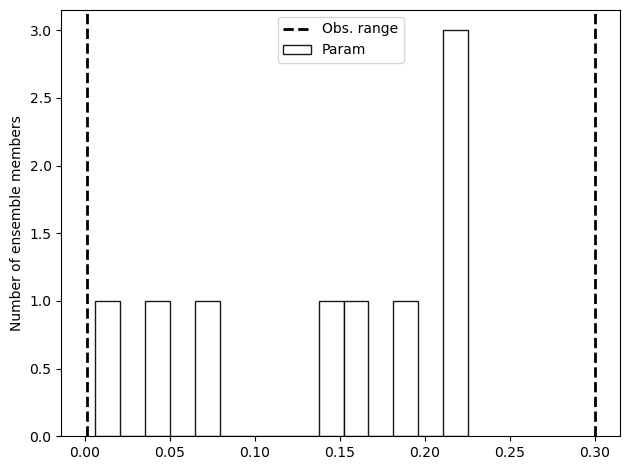

fates_fire_nignitions
0
1
11
   pft_ineq                  param  pft  organ  value_min  value_max  \
25    FALSE  fates_fire_nignitions    0    NaN        0.1        3.5   

   apriori_value   source_min       source_max   source_apriori  \
25  0.25 for CZ2   1 for STAN  Initial testing  Initial testing   

           comments link  additional_values  
25  Initial testing  NaN                NaN  


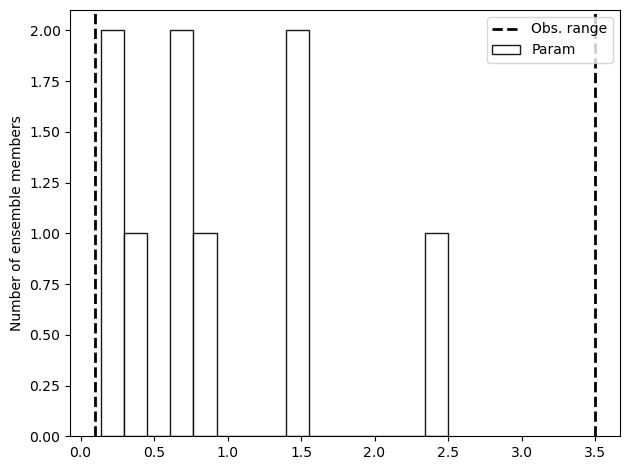

fates_fire_threshold
0
1
11
   pft_ineq                 param  pft  organ  value_min  value_max  \
26    FALSE  fates_fire_threshold    0    NaN        1.0       50.0   

   apriori_value       source_min     source_max   source_apriori comments  \
26             1  Initial testing  Fates default  Initial testing      NaN   

   link  additional_values  
26  NaN                NaN  


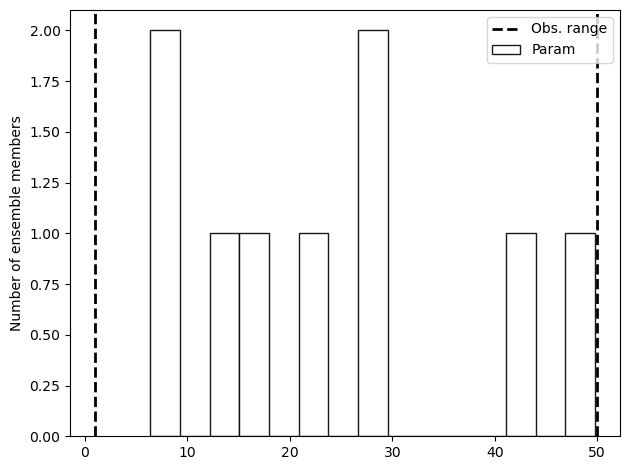

fates_fire_frac_resprout
4
2
20
   pft_ineq                     param  pft  organ  value_min  value_max  \
48    FALSE  fates_fire_frac_resprout    4    NaN       0.05        0.6   

   apriori_value               source_min               source_max  \
48           NaN  tuning and Pausas, 2014  tuning and Pausas, 2014   

   source_apriori comments link  additional_values  
48            NaN      NaN  NaN                NaN  


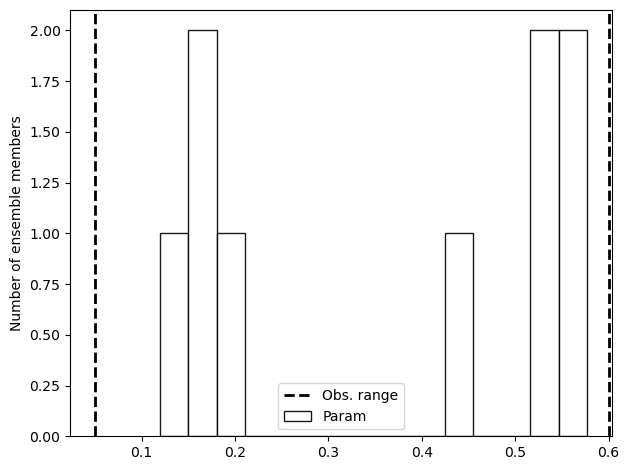

fates_fire_frac_resprout
5
2
19
   pft_ineq                     param  pft  organ  value_min  value_max  \
49    FALSE  fates_fire_frac_resprout    5    NaN        0.5       0.99   

   apriori_value                                 source_min  \
49           NaN  Initial testing and Ackerley et al., 2019   

                                   source_max source_apriori comments link  \
49  Initial testing and Ackerley et al., 2019            NaN      NaN  NaN   

    additional_values  
49                NaN  


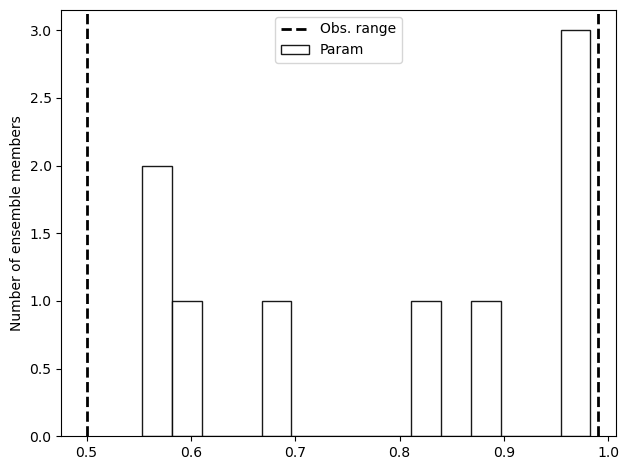

fates_disturbance_germ
4
1
20
   pft_ineq                   param  pft  organ  value_min  value_max  \
60    FALSE  fates_disturbance_germ    4    NaN       10.0      100.0   

   apriori_value               source_min               source_max  \
60            50  Tuning and Reeves, 2006  Tuning and Reeves, 2006   

     source_apriori                                           comments  \
60  Initial testing  The total germination rate after disturbance w...   

                                                 link  additional_values  
60  https://www.fs.usda.gov/database/feis/plants/s...                NaN  


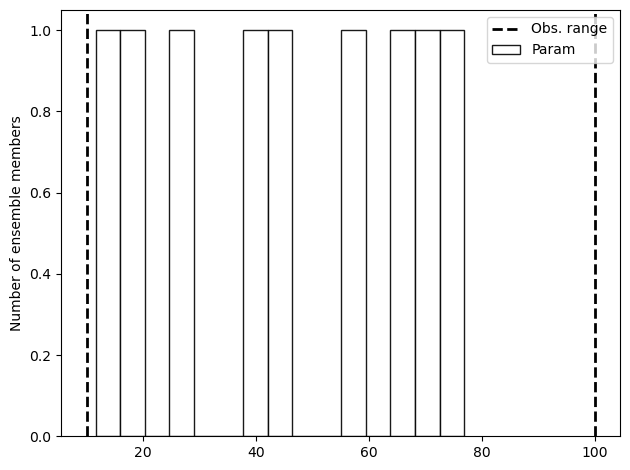

fates_recruit_seed_germination_rate
4
5
20
   pft_ineq                                param  pft  organ  value_min  \
58    FALSE  fates_recruit_seed_germination_rate    4    NaN      0.005   

    value_max apriori_value source_min source_max   source_apriori comments  \
58       0.02          0.01     Tuning     Tuning  Initial testing      NaN   

   link  additional_values  
58  NaN                NaN  


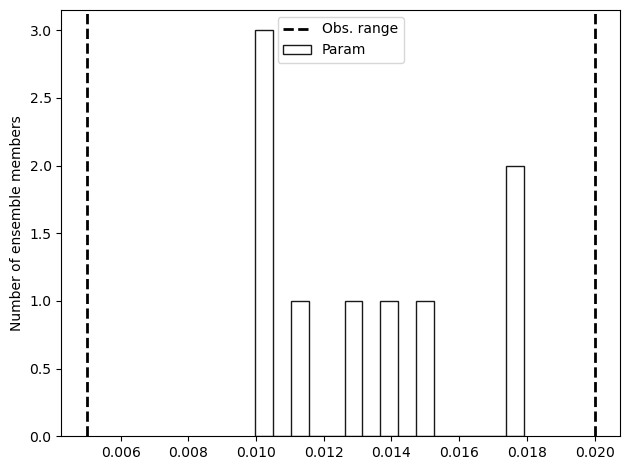

fates_mort_bmort
1
5
17
   pft_ineq             param  pft  organ  value_min  value_max apriori_value  \
27    FALSE  fates_mort_bmort    1    NaN      0.002      0.008         0.008   

                   source_min           source_max       source_apriori  \
27  Initial testing was 0.004  Buotte et al., 2021  Buotte et al., 2021   

                                             comments link  additional_values  
27  Using Buotte, 2021 as the max because we need ...  NaN                NaN  


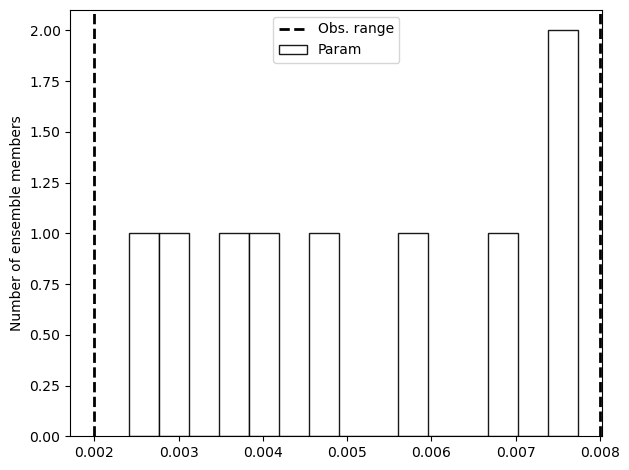

In [59]:
for var in vars:
    HistModelObs(PEAS_members,param_ranges,var)

In [29]:
param_ranges

,pft_ineq,param,pft,organ,value_min,value_max,apriori_value,source_min,source_max,source_apriori,comments,link,additional_values
0,FALSE,fates_recruit_seed_alloc_mature,1,NaN,0.040000,0.392860,0.392860281514004,"Wenk & Falster, 2015 (Abies)","Buotte et al., 2021","Buotte et al., 2021",I want a wide range in this because I saw that...,NaN,NaN
1,<pine,fates_recruit_seed_alloc_mature,2,NaN,0.040000,0.392860,0.270920433068498,"Wenk & Falster, 2015 (Abies)","Buotte et al., 2021","Buotte et al., 2021",NaN,NaN,NaN
2,<pine,fates_recruit_seed_alloc_mature,3,NaN,0.040000,0.392860,0.270920433068498,"Wenk & Falster, 2015 (Abies)","Buotte et al., 2021","Buotte et al., 2021",NaN,NaN,NaN
3,FALSE,fates_recruit_seed_alloc_mature,4,NaN,0.210000,0.530000,0.4,"Wenk & Falster, 2015","Wenk & Falster, 2015",070723 param,Based on the two shrubs shown in Table 2,https://onlinelibrary.wiley.com/doi/10.1002/ec...,NaN
4,FALSE,fates_recruit_seed_alloc_mature,5,NaN,0.100000,0.420000,0.3,Fates default,"Wenk & Falster, 2015",070723 param,Based on Quercus acuta and Quercus salicina sh...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,fates_allom_d2ca_coefficient_max,fates_allom_d2ca_coefficient_min,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,FALSE,fates_allom_agb1,1,NaN,0.064731,0.084150,NaN,Chojnacky (AGB) and Baad,tuning. This was moved up by 30% from original...,NaN,NaN,NaN,NaN
98,pine,fates_allom_agb1,2,NaN,0.064731,0.084150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,pine,fates_allom_agb1,3,NaN,0.064731,0.084150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
